Track reconstruction
=================

For all the exercises in today's lab, we will be using a well-known pattern recognition problem that arises in particle physics experiments.

After particles leave traces in a detector, it is useful to find the trajectories that particles described as they passed through the detector. **Track reconstruction** consists in associating the fired hits (the *tracks*) in a detector that belong to each individual particle.

Track reconstruction yields interesting information about the particles, such as their trajectory, momenta and charge. Tracks are typically not reconstructed in one go however, but instead the problem is simplified into several parts that match geometrically to the conditions of the detector.

Let's see one example of tracking right away. From the image on the left with hits, we should separate the hits in *tracks* which represent particle trajectories, like the image on the right:

<img src="docs/example_track_reco.png" alt="Velopix reconstruction example" style="width: 600px;"/>

We will be looking at a specific track reconstruction problem: the one that occurs in the LHCb detector at CERN. Concretely, the [VELO pixel subdetector](https://lhcb-public.web.cern.ch/en/detector/VELO-en.html) consists of 52 modules, each of them with three silicon chips that detect particles as "pixels" in an array.

<img src="docs/velopix_front.png" alt="Velopix subdetector" />

Exercise 1
---------------

First, let's take some Monte Carlo simulated data to play with. This is a wider practice than what you may initially think: simulated data are used to develop and validate algorithms long before the detector hardware even exists. It can also help drive the decision of how the detector should be made!

In [1]:
# Run this only once
!git clone https://github.com/dcampora/velopix_tracking.git

Cloning into 'velopix_tracking'...


Alongside the project you just fetched are 10 events to play with. They are encoded in the json format, and the python library "json" knows just how to handle them:

In [2]:
import sys, os
sys.path.append(os.getcwd() + "/../")
sys.path.append(os.getcwd() + "/velopix_tracking/")

import json
from event_model import event_model as em

f = open("velopix_tracking/events/velo_event_0.json")
json_data = json.loads(f.read())
event = em.event(json_data)
f.close()

You now have loaded onto memory an `event`. An event is LHC jargon for a bunch crossing, a 25-nanosecond window where particles collided and stuff happened. Let's start by inspecting what we can do with this event.

* Find out what you can do with the `event`.

In [3]:
help(event)

Help on event in module event_model.event_model object:

class event(builtins.object)
 |  event(json_data)
 |
 |  Event defined by its json description.
 |
 |  Methods defined here:
 |
 |  __init__(self, json_data)
 |      Initialize self.  See help(type(self)) for accurate signature.
 |
 |  ----------------------------------------------------------------------
 |  Data descriptors defined here:
 |
 |  __dict__
 |      dictionary for instance variables
 |
 |  __weakref__
 |      list of weak references to the object



As was said in the introduction, there should be 52 modules available.

* Find out what you can do with a module.
* Print modules 0, 2 and 4.

In [5]:
print(event.modules[0])
print(event.modules[2])
print(event.modules[4])

module 0:
 At z: {-288.08, -286.918}
 Number of hits: 20
 Hits (#id {x, y, z}): [#0 module 0 {9.18, -30.509, -288.08}, #1 module 0 {-9.137, -12.308, -288.08}, #2 module 0 {-8.806, -8.711, -288.08}, #3 module 0 {-9.623, -5.171, -288.08}, #4 module 0 {-21.73, -20.093, -286.918}, #5 module 0 {-16.422, -19.918, -286.918}, #6 module 0 {-12.455, -24.43, -286.918}, #7 module 0 {-11.832, -24.818, -286.918}, #8 module 0 {-7.827, -28.124, -286.918}, #9 module 0 {8.759, -44.478, -286.918}, #10 module 0 {-5.415, -22.407, -286.918}, #11 module 0 {-4.365, -34.152, -286.918}, #12 module 0 {-7.574, -37.711, -286.918}, #13 module 0 {-7.418, -37.75, -286.918}, #14 module 0 {-5.424, 6.221, -286.918}, #15 module 0 {-11.005, 11.49, -286.918}, #16 module 0 {-28.292, -8.771, -286.918}, #17 module 0 {-39.789, 6.663, -288.08}, #18 module 0 {-33.795, 2.468, -288.08}, #19 module 0 {-15.458, 15.438, -288.08}]
module 2:
 At z: {-263.08, -261.918}
 Number of hits: 21
 Hits (#id {x, y, z}): [#57 module 2 {8.499, -28

Each module has a number of hits, which represent the fired signals that were left by the (simulated) charged particles as they crossed them.

* Printing the module showed all the hits... but anyway, print all hits for module 0, this time iterating through the hits yourself.
* What are the minimum and maximum values of X, Y and Z of all hits in the module?

In [14]:
print(event.modules[0].hits)

max_hit_x = max([hit.x for hit in event.modules[0].hits()])
max_hit_y = max([hit.y for hit in event.modules[0].hits()])
max_hit_z = max([hit.z for hit in event.modules[0].hits()])
print(f"Max x: {max_hit_x}\nMax y: {max_hit_y}\nMax z: {max_hit_z}")

min_hit_x = min([hit.x for hit in event.modules[0].hits()])
min_hit_y = min([hit.y for hit in event.modules[0].hits()])
min_hit_z = min([hit.z for hit in event.modules[0].hits()])

print(f"Min x: {min_hit_x}\nMin y: {min_hit_y}\nMin z: {min_hit_z}")

<bound method module.hits of module 0:
 At z: {-288.08, -286.918}
 Number of hits: 20
 Hits (#id {x, y, z}): [#0 module 0 {9.18, -30.509, -288.08}, #1 module 0 {-9.137, -12.308, -288.08}, #2 module 0 {-8.806, -8.711, -288.08}, #3 module 0 {-9.623, -5.171, -288.08}, #4 module 0 {-21.73, -20.093, -286.918}, #5 module 0 {-16.422, -19.918, -286.918}, #6 module 0 {-12.455, -24.43, -286.918}, #7 module 0 {-11.832, -24.818, -286.918}, #8 module 0 {-7.827, -28.124, -286.918}, #9 module 0 {8.759, -44.478, -286.918}, #10 module 0 {-5.415, -22.407, -286.918}, #11 module 0 {-4.365, -34.152, -286.918}, #12 module 0 {-7.574, -37.711, -286.918}, #13 module 0 {-7.418, -37.75, -286.918}, #14 module 0 {-5.424, 6.221, -286.918}, #15 module 0 {-11.005, 11.49, -286.918}, #16 module 0 {-28.292, -8.771, -286.918}, #17 module 0 {-39.789, 6.663, -288.08}, #18 module 0 {-33.795, 2.468, -288.08}, #19 module 0 {-15.458, 15.438, -288.08}]>
Max x: 9.18
Max y: 15.438
Max z: -286.918
Min x: -39.789
Min y: -44.478
Min

Exercise 2
---------------

Let's start by visualizing the event that you were inspecting all along.

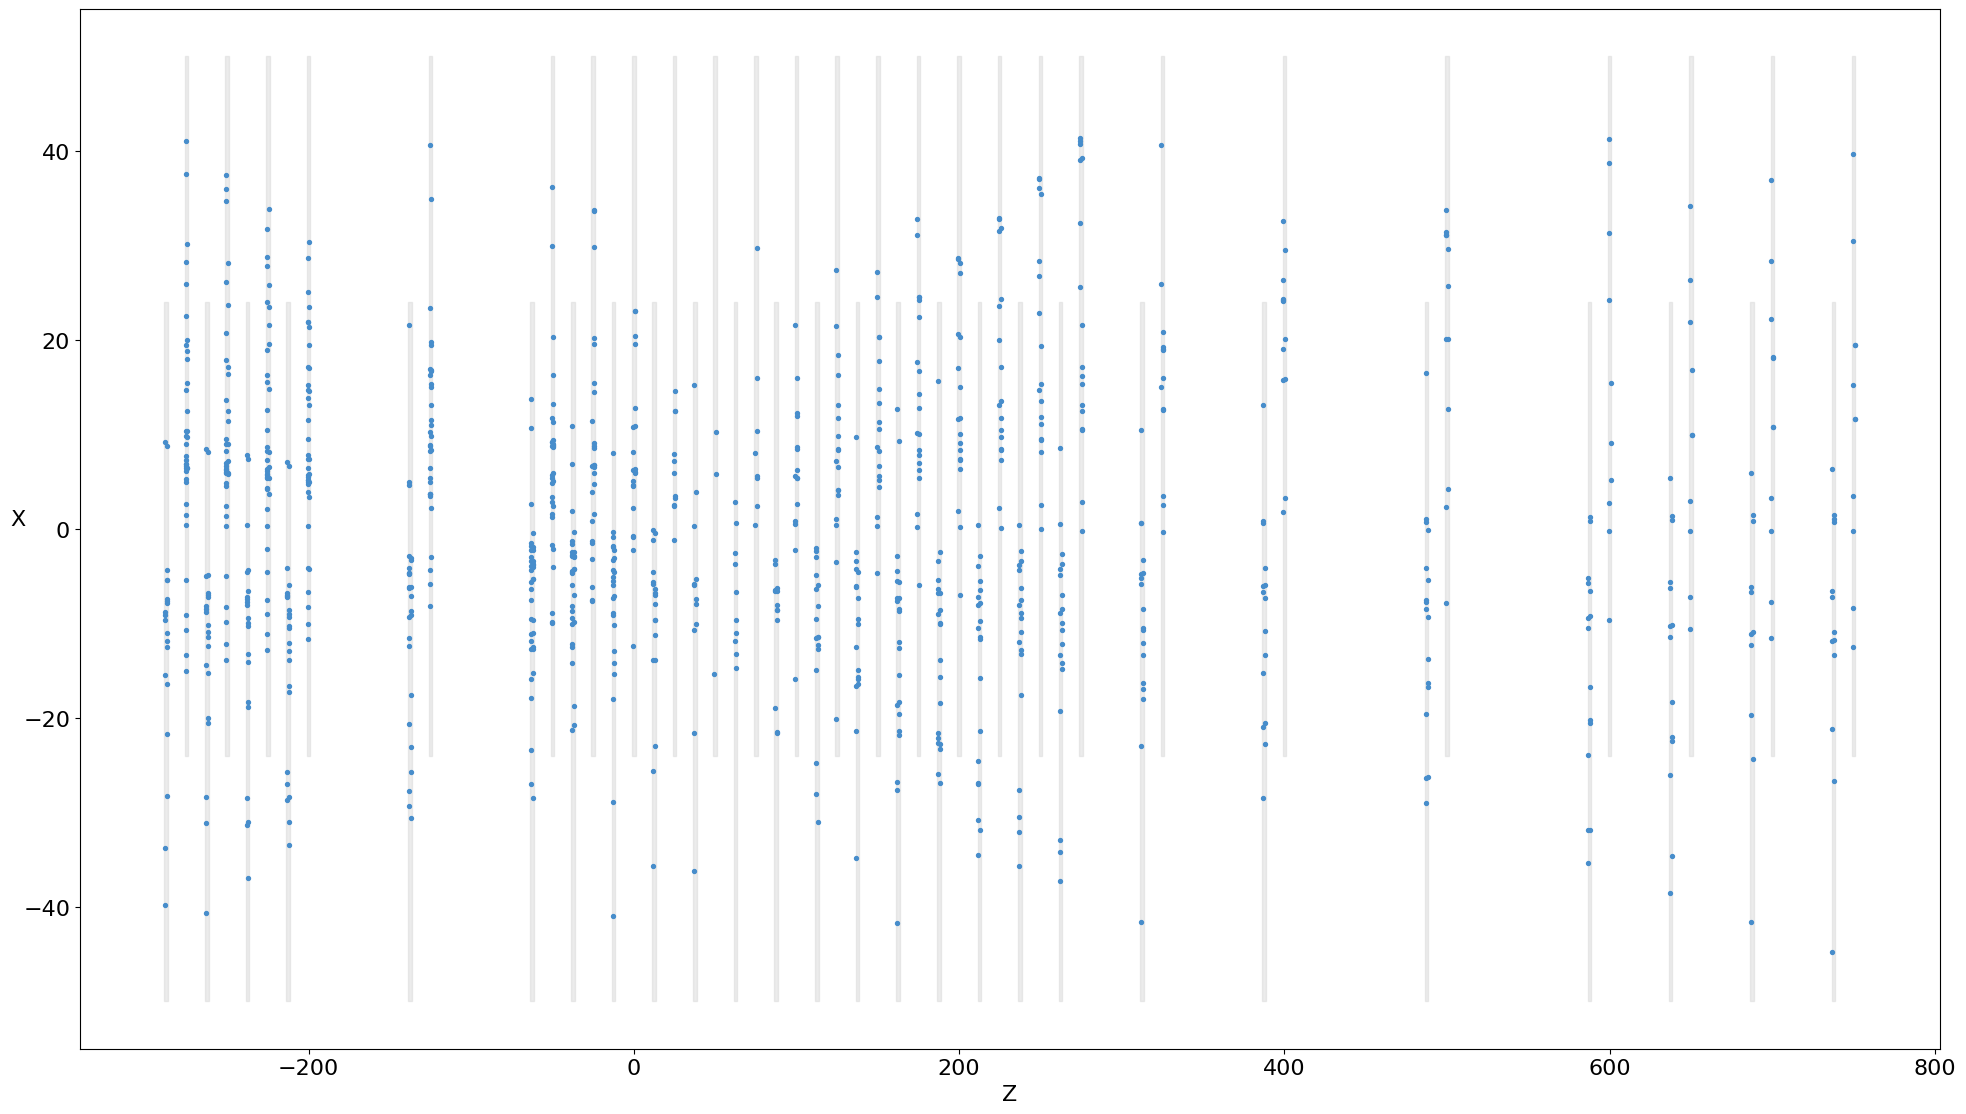

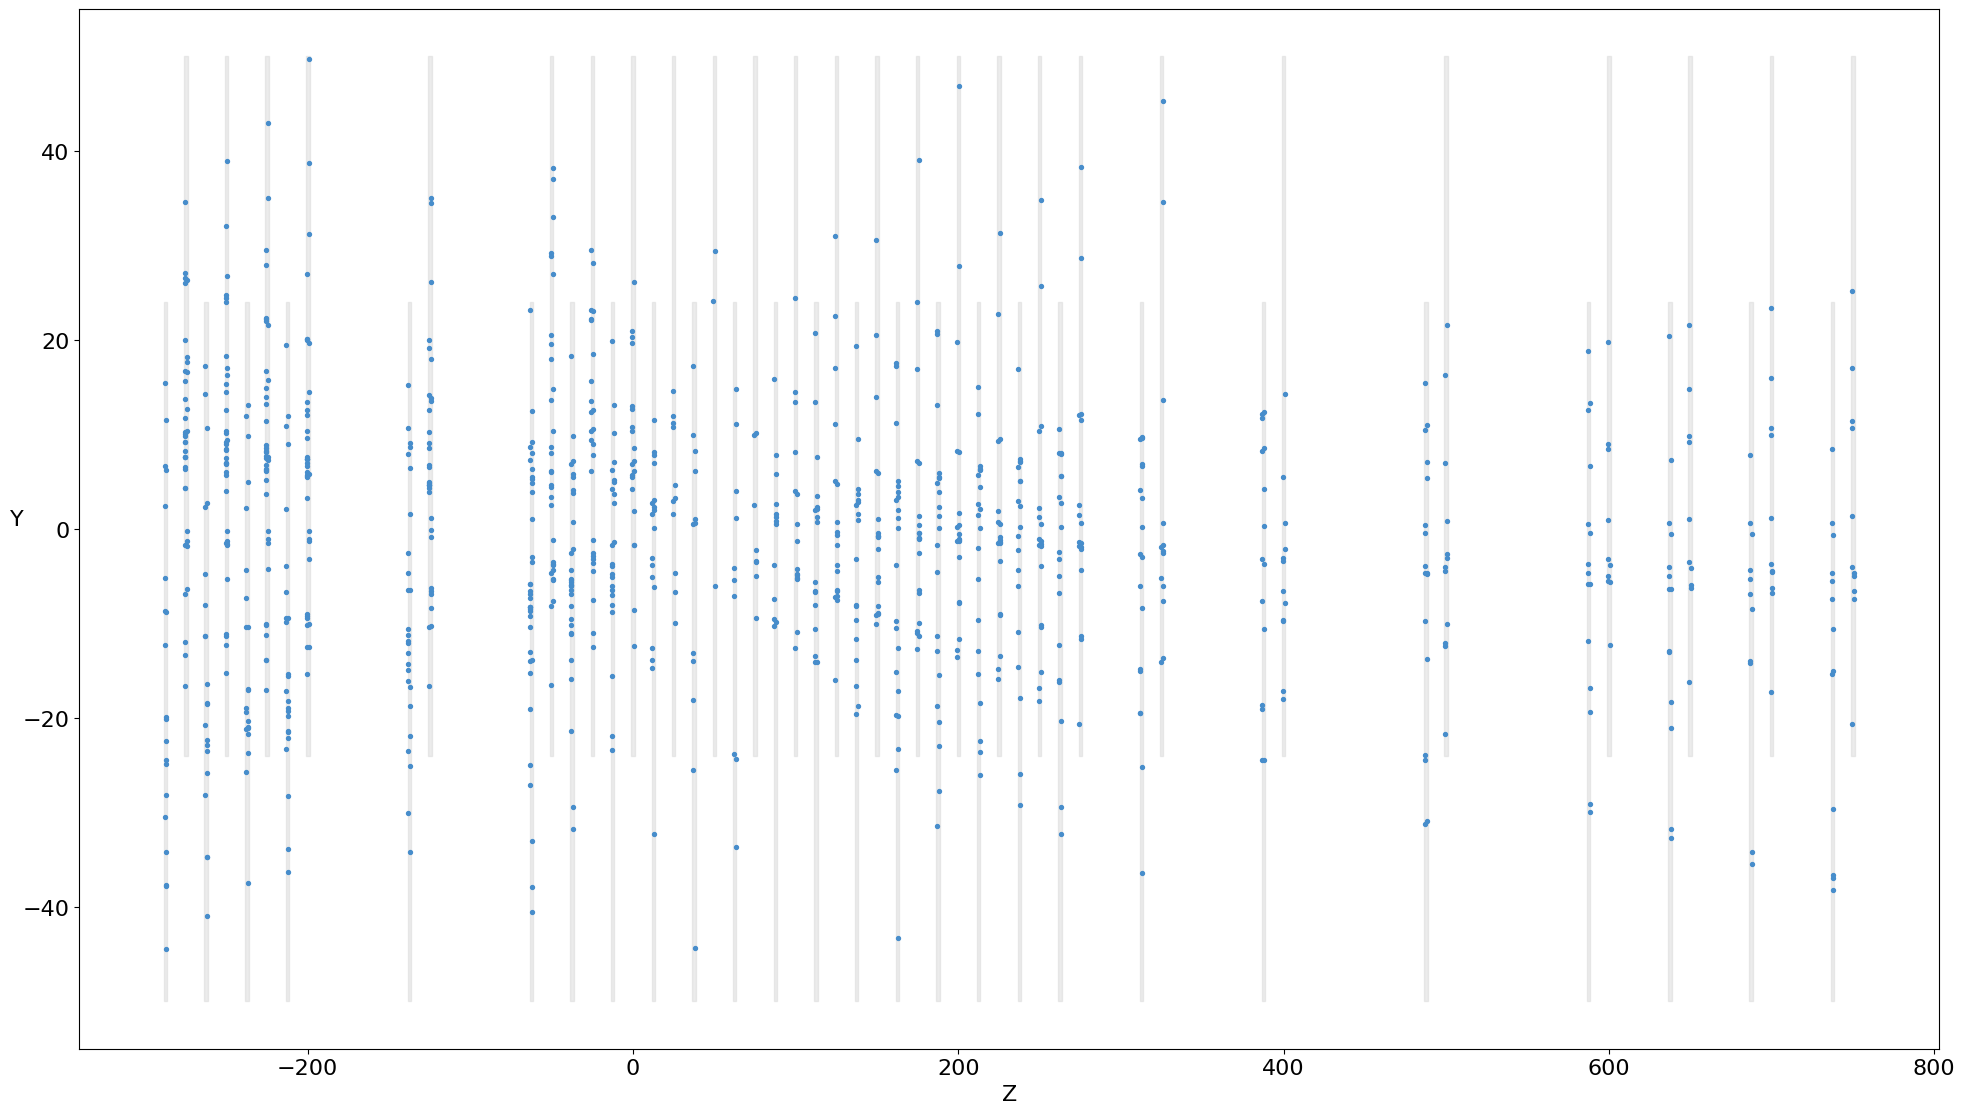

In [11]:
from visual.base import print_event_2d
%matplotlib inline

print_event_2d(event)
print_event_2d(event, y=1)

You may use the `print_event_2d` to... wait, you can do this too:

* Use the function `help` to find out what you can do with the `print_event_2d` function.
* Print only modules `0, 2, 4` of the event.

Help on function print_event_2d in module visual.base:

print_event_2d(
    event,
    tracks=[],
    x=2,
    y=0,
    track_color=0,
    filename='visual.png',
    save_to_file=False,
    modules=[]
)
    A function to print events. It produces a 2D plot
    and either prints or saves it to a file.

    Arguments
    ---------

    event : the event to be printed
    modules : list of modules to be printed
    tracks : tracks to print
    track_color : color of tracks (in 0-20 range)
    x : index to be used as x axis
    y : index to be used as y axis
    save_to_file : switches between saving output to file or showing it (default)
    filename : file where to save visualization



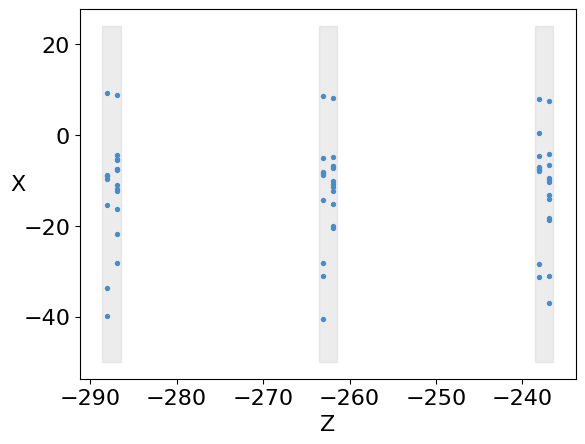

In [ ]:
help(print_event_2d)
print_event_2d(event, modules=[0, 2, 4])

You can now create some tracks. In this simplistic python *event model* the type `em.track` expects a list of hits. A track is simply a list of hits.

* Create some `track`s with hits from modules `0, 2, 4`. A track should typically contain at least three hits, and not contain any hits from the same module.
* Visualize modules `0, 2, 4` with the tracks you have created.
* How many tracks could you create with hits from these modules?
* How many tracks with no overlapping hits could you create with hits from these modules?

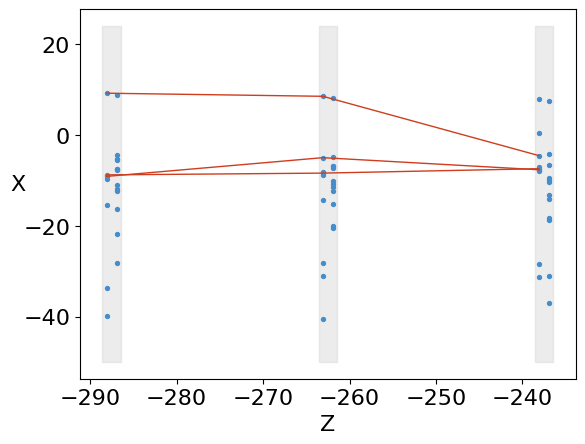

Possible tracks: 8820
Possible track without overlapping hits: 20


In [25]:
track_1 = em.track([event.modules[0].hits()[0],
           event.modules[2].hits()[0],
           event.modules[4].hits()[0]])
track_2 = em.track([event.modules[0].hits()[1],
           event.modules[2].hits()[1],
           event.modules[4].hits()[1]])
track_3 = em.track([event.modules[0].hits()[2],
           event.modules[2].hits()[2],
           event.modules[4].hits()[2]])

print_event_2d(event, modules = [0, 2, 4],tracks=[track_1, track_2, track_3])

possible_tracks = len(event.modules[0].hits()) * len(event.modules[2].hits()) * len(event.modules[4].hits())
print(f"Possible tracks: {possible_tracks}")

possible_tracks_no_overlap = min(len(event.modules[0].hits()), len(event.modules[2].hits()), len(event.modules[4].hits()))
print(f"Possible track without overlapping hits: {possible_tracks_no_overlap}")